<a href="https://colab.research.google.com/github/ProsperChuks/linear-regression/blob/main/simple_linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import random

### getting the slope and y_intercept for a regression line

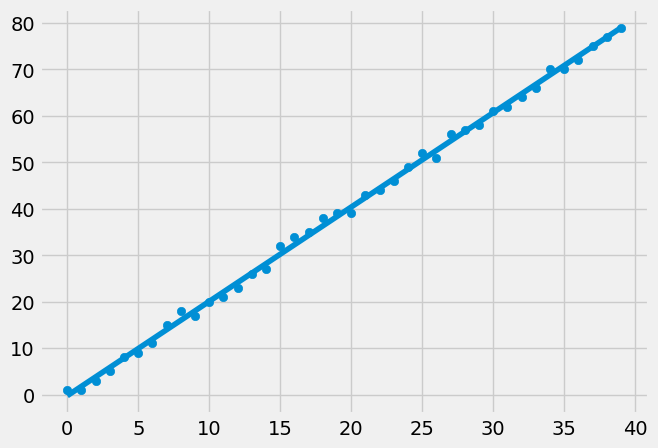

In [ ]:
# xs = np.array([1,2,3,4,5,6], dtype='float64')
# ys = np.array([5,4,6,5,6,7], dtype='float64')

plt.figure(figsize=(7,5), dpi=100)
plt.style.use('fivethirtyeight')

def create_dataset(hmp, variance, step=2, correlation=False):
  
  val = 1
  ys = []
  for i in range(hmp):
    y = val + random.randrange(-variance, variance)
    ys.append(y)
    if correlation and correlation == 'pos':
      val+=step
    elif correlation and correlation == 'neg':
      val-=step
  xs = [i for i in range(len(ys))]

  return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

def best_fit_slope_and_y_intercept(xs, ys):

  m = (   ((mean(xs) * mean(ys)) - mean(xs * ys)) /   
       (mean(xs)**2 - mean(xs**2))  )
  b = mean(ys) - m*mean(xs)
  return m, b

def squared_error(ys_orig, ys_line):
  return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):

  y_mean = [mean(ys_orig) for y in ys_orig]
  square_err_reg = squared_error(ys_orig, ys_line)
  square_err_y_mean = squared_error(ys_orig, y_mean)
  return 1 - (square_err_reg / square_err_y_mean)

xs, ys = create_dataset(40, 2, 2, correlation='pos')

m,b = best_fit_slope_and_y_intercept(xs, ys)

regression_line = [(m*x) + b for x in xs]
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

### making a small prediction

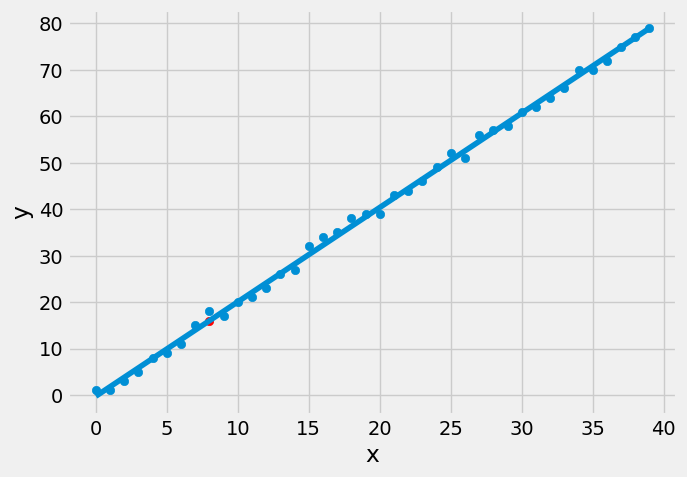

In [ ]:
# trying to predict y on input 8
plt.figure(figsize=(7,5), dpi=100)

input_valx = 8
predict_y = (m*input_valx)+b

plt.scatter(xs, ys)
plt.scatter(input_valx, predict_y, color='r')
plt.plot(xs, regression_line)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### calculating the coefficient of determination

In [ ]:
from sklearn.metrics import r2_score
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

r2 = r2_score(ys, regression_line)
print(r2)

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(ys, regression_line))
'%.3f'%rmse

0.9981811151053378
0.9981811151053378


'1.001'